In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d915df91bdd5ded8e527096c23b91b1c


In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | naze
Processing Record 2 of Set 1 | dikson
Processing Record 3 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | phan thiet
Processing Record 7 of Set 1 | quballat
Processing Record 8 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 9 of Set 1 | salinas
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | east london
Processing Record 13 of Set 1 | kavieng
Processing Record 14 of Set 1 | crangeni
Processing Record 15 of Set 1 | tuktoyaktuk
Processing Record 16 of Set 1 | srostki
Processing Record 17 of Set 1 | fonte boa
Processing Record 18 of Set 1 | etla
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | coffs harbour
Processing Record 22 of 

Processing Record 35 of Set 4 | hofn
Processing Record 36 of Set 4 | tromso
Processing Record 37 of Set 4 | nehe
Processing Record 38 of Set 4 | castro
Processing Record 39 of Set 4 | pisco
Processing Record 40 of Set 4 | floro
Processing Record 41 of Set 4 | marcona
City not found. Skipping...
Processing Record 42 of Set 4 | luau
Processing Record 43 of Set 4 | chuy
Processing Record 44 of Set 4 | muravlenko
Processing Record 45 of Set 4 | trairi
Processing Record 46 of Set 4 | baker city
Processing Record 47 of Set 4 | new norfolk
Processing Record 48 of Set 4 | tubuala
Processing Record 49 of Set 4 | truth or consequences
Processing Record 50 of Set 4 | warqla
City not found. Skipping...
Processing Record 1 of Set 5 | praia da vitoria
Processing Record 2 of Set 5 | half moon bay
Processing Record 3 of Set 5 | bundaberg
Processing Record 4 of Set 5 | padang
Processing Record 5 of Set 5 | kaa-khem
Processing Record 6 of Set 5 | trincomalee
Processing Record 7 of Set 5 | nueva germania

Processing Record 28 of Set 8 | kharovsk
Processing Record 29 of Set 8 | kargopol
Processing Record 30 of Set 8 | cockburn town
Processing Record 31 of Set 8 | muriae
Processing Record 32 of Set 8 | rudbar
Processing Record 33 of Set 8 | den helder
Processing Record 34 of Set 8 | ust-nera
Processing Record 35 of Set 8 | komsomolskiy
Processing Record 36 of Set 8 | chabahar
Processing Record 37 of Set 8 | miyako
Processing Record 38 of Set 8 | gondanglegi
Processing Record 39 of Set 8 | kose
Processing Record 40 of Set 8 | amapa
Processing Record 41 of Set 8 | kegayli
City not found. Skipping...
Processing Record 42 of Set 8 | kula
Processing Record 43 of Set 8 | port lincoln
Processing Record 44 of Set 8 | gayny
Processing Record 45 of Set 8 | lagunas
Processing Record 46 of Set 8 | linxia
Processing Record 47 of Set 8 | karoi
Processing Record 48 of Set 8 | grand-santi
Processing Record 49 of Set 8 | kalmunai
Processing Record 50 of Set 8 | severo-kurilsk
Processing Record 1 of Set 9 

Processing Record 21 of Set 12 | sayyan
Processing Record 22 of Set 12 | garowe
Processing Record 23 of Set 12 | aswan
Processing Record 24 of Set 12 | michalovce
Processing Record 25 of Set 12 | bull savanna
Processing Record 26 of Set 12 | bom jesus
Processing Record 27 of Set 12 | portland
Processing Record 28 of Set 12 | navabad
City not found. Skipping...
Processing Record 29 of Set 12 | mandalgovi
Processing Record 30 of Set 12 | tuggurt
City not found. Skipping...
Processing Record 31 of Set 12 | itoman
Processing Record 32 of Set 12 | sanary-sur-mer
Processing Record 33 of Set 12 | pimentel
Processing Record 34 of Set 12 | sur
Processing Record 35 of Set 12 | tilichiki
Processing Record 36 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 37 of Set 12 | taoudenni
Processing Record 38 of Set 12 | sikonge
Processing Record 39 of Set 12 | pafos
Processing Record 40 of Set 12 | palmer
Processing Record 41 of Set 12 | maryville
Processing Record 42 of Set 12 | 

In [12]:
len(city_data)

557

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Naze,28.3667,129.4833,81.64,76,100,7.85,JP,2021-07-14 02:09:21
1,Dikson,73.5069,80.5464,35.38,89,30,15.93,RU,2021-07-14 02:09:21
2,Mataura,-46.1927,168.8643,48.96,71,100,7.07,NZ,2021-07-14 02:09:21
3,Atuona,-9.8000,-139.0333,78.24,73,13,21.77,PF,2021-07-14 02:09:21
4,Phan Thiet,10.9333,108.1000,83.32,73,100,2.46,VN,2021-07-14 02:09:22
5,Quballat,36.5418,9.6633,73.62,64,0,11.30,TN,2021-07-14 02:09:22
6,Salinas,36.6777,-121.6555,74.70,74,90,10.36,US,2021-07-14 02:09:22
7,Punta Arenas,-53.1500,-70.9167,26.71,93,75,3.44,CL,2021-07-14 02:08:39
8,Hermanus,-34.4187,19.2345,48.90,74,30,9.31,ZA,2021-07-14 02:09:22
9,East London,-33.0153,27.9116,52.90,57,37,19.57,ZA,2021-07-14 02:09:23


In [16]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Naze,JP,2021-07-14 02:09:21,28.3667,129.4833,81.64,76,100,7.85
1,Dikson,RU,2021-07-14 02:09:21,73.5069,80.5464,35.38,89,30,15.93
2,Mataura,NZ,2021-07-14 02:09:21,-46.1927,168.8643,48.96,71,100,7.07
3,Atuona,PF,2021-07-14 02:09:21,-9.8000,-139.0333,78.24,73,13,21.77
4,Phan Thiet,VN,2021-07-14 02:09:22,10.9333,108.1000,83.32,73,100,2.46
5,Quballat,TN,2021-07-14 02:09:22,36.5418,9.6633,73.62,64,0,11.30
6,Salinas,US,2021-07-14 02:09:22,36.6777,-121.6555,74.70,74,90,10.36
7,Punta Arenas,CL,2021-07-14 02:08:39,-53.1500,-70.9167,26.71,93,75,3.44
8,Hermanus,ZA,2021-07-14 02:09:22,-34.4187,19.2345,48.90,74,30,9.31
9,East London,ZA,2021-07-14 02:09:23,-33.0153,27.9116,52.90,57,37,19.57


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

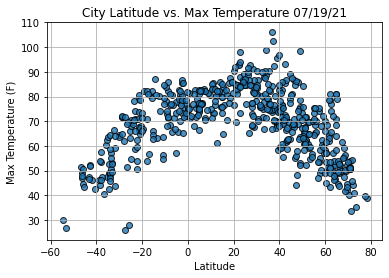

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

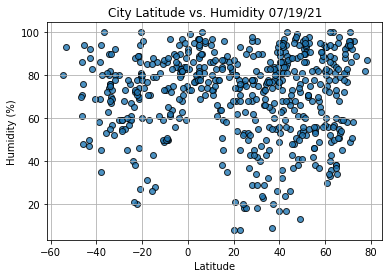

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

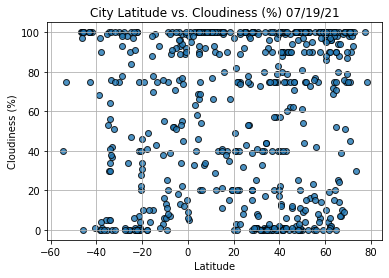

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

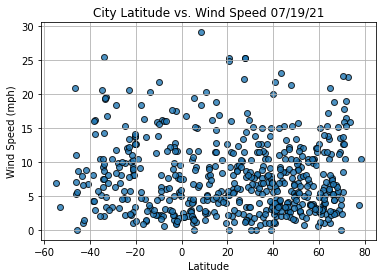

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()